# Linear regression on mtcars dataset to predict hp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('mtcars.csv')
df.head(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [3]:
df.shape

(32, 12)

In [4]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

### Step 1: Remove unwanted features

remove the model name as it is unnecessary

In [6]:
df = df.iloc[:, 1:]
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Check for linearity

In [7]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [11]:
df_linear = df.loc[:,['mpg','cyl','disp','qsec','vs','carb','hp']]
df_linear.head()

,mpg,cyl,disp,qsec,vs,carb,hp
0,21.0,6,160.0,16.46,0,4,110
1,21.0,6,160.0,17.02,0,4,110
2,22.8,4,108.0,18.61,1,1,93
3,21.4,6,258.0,19.44,1,1,110
4,18.7,8,360.0,17.02,0,2,175


### Step 3: Check for multivariate linearity

In [12]:
df_linear.corr().hp

mpg    -0.776168
cyl     0.832447
disp    0.790949
qsec   -0.708223
vs     -0.723097
carb    0.749812
hp      1.000000
Name: hp, dtype: float64

In [13]:
for i in df_linear:
    print('Skewness of {} is {} and kurtosis is {}'.format(i,stats.skew(df[i]),stats.kurtosis(df[i])))

Skewness of mpg is 0.6404398640318834 and kurtosis is -0.20053320971549793
Skewness of cyl is -0.18312865234479678 and kurtosis is -1.6809684168130405
Skewness of disp is 0.40027244847286664 and kurtosis is -1.0896826570135087
Skewness of qsec is 0.387045551397312 and kurtosis is 0.5537533411457876
Skewness of vs is 0.25197631533948484 and kurtosis is -1.9365079365079365
Skewness of carb is 1.1021303870140253 and kurtosis is 1.536120819189267
Skewness of hp is 0.7614356361333623 and kurtosis is 0.05223272840399584


Now we know that skewness should be in |1| and kurtosis value should also be typically in |1| so any feature not satisfying these values have to be removed.

Here from the above normality test we can see that the following features fail the normality test
1. cyl
2. vs
3. carb

In [15]:
df_normal = df_linear.loc[:,['mpg','disp','qsec','hp']]
df_normal.head()

,mpg,disp,qsec,hp
0,21.0,160.0,16.46,110
1,21.0,160.0,17.02,110
2,22.8,108.0,18.61,93
3,21.4,258.0,19.44,110
4,18.7,360.0,17.02,175


<AxesSubplot:xlabel='hp', ylabel='Density'>

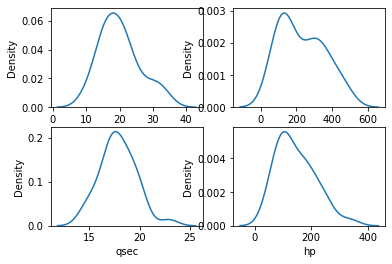

In [16]:
fig, axs = plt.subplots(2,2)

sns.kdeplot(x = df_normal.mpg, ax=axs[0,0])
sns.kdeplot(x = df_normal.disp, ax=axs[0,1])
sns.kdeplot(x = df_normal.qsec, ax=axs[1,0])
sns.kdeplot(x = df_normal.hp, ax=axs[1,1])

### step 4: Check for colinearity

<AxesSubplot:>

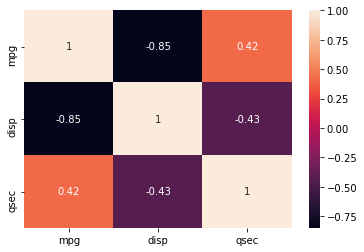

In [18]:
corr = df_normal.iloc[:,:-1].corr()
sns.heatmap(corr, annot=True)

In [19]:
df_normal.corr()

,mpg,disp,qsec,hp
mpg,1.000000,-0.847551,0.418684,-0.776168
disp,-0.847551,1.000000,-0.433698,0.790949
qsec,0.418684,-0.433698,1.000000,-0.708223
hp,-0.776168,0.790949,-0.708223,1.000000


Here we can remove mpg as it has very high correlation with other features

In [21]:
df_corr = df_normal.iloc[:,1:]
df_corr.corr()

,disp,qsec,hp
disp,1.000000,-0.433698,0.790949
qsec,-0.433698,1.000000,-0.708223
hp,0.790949,-0.708223,1.000000


## Now we start with ML model building

### First we perform a split to separate our predictors and target
### Then we perform a train test split and then we build the model

In [23]:
# predictor
X = df_corr.iloc[:,:-1]

# target
y = df_corr.hp

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

r2_score(y_test, y_predict)

0.9209603820702953

## Here we can say that our model is 92 percent accurate in predicting the horse power of the car

## Lets try to predict hp of a car whose disp is 180 and qsec is 19

In [24]:
disp = 180
qsec = 19
model.predict([[disp,qsec]])

array([111.64832898])

## So we can be 92 % sure that a car with 180 units disp and 19 units qsec has a hp of 111 